<a href="https://colab.research.google.com/github/Cyrus-White/HW-Project-Files-/blob/main/Machine%20Learning%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-1e5324bc9797>:21: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range(start="2023-01-01", periods=1000, freq='5T')
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Results - Accuracy: 1.00, Precision: 0.00, Recall: 0.00
K-Means Clustering Applied - Clusters Identified


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.1536 - val_loss: 0.0336
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0358 - val_loss: 0.0340
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0394 - val_loss: 0.0345
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0360 - val_loss: 0.0332
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0360 - val_loss: 0.0330
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0340 - val_loss: 0.0327
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0399 - val_loss: 0.0340
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0342 - val_loss: 0.0357
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0343 - val_loss: 0.0326
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0353 - val_loss: 0.0329


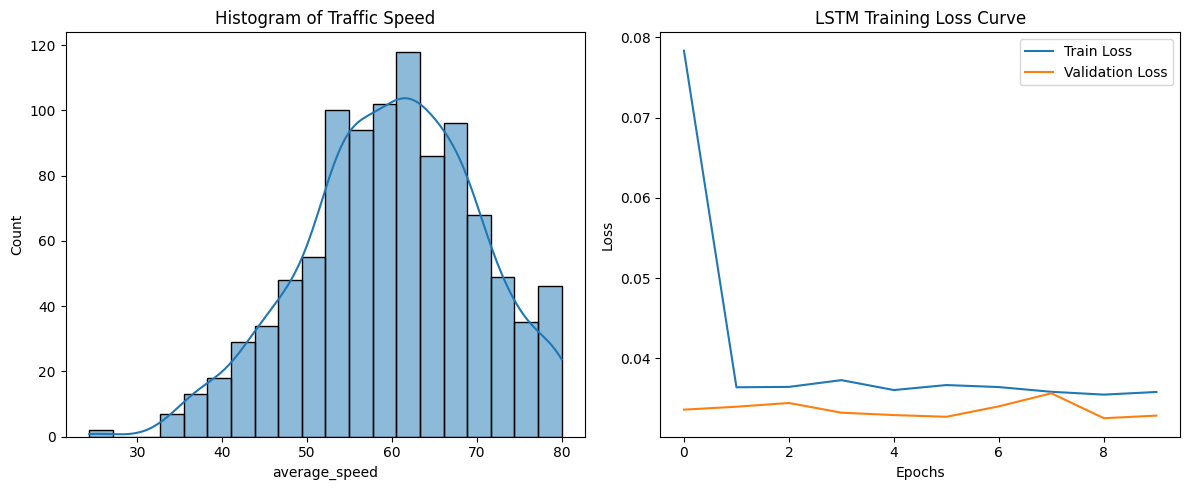

Notebook Completed - Models and Visualizations Generated


In [1]:
# Google Colab Notebook for Traffic Pattern Prediction and Optimization

# Install Required Packages
!pip install tensorflow scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Simulated Dataset (METR-LA Alternative for Demo)
np.random.seed(42)
timestamps = pd.date_range(start="2023-01-01", periods=1000, freq='5T')
sensor_ids = np.random.randint(1, 208, size=1000)
speeds = np.random.normal(loc=60, scale=10, size=1000).clip(0, 80)  # Clipped at 80 mph

df = pd.DataFrame({'timestamp': timestamps, 'sensor_id': sensor_ids, 'average_speed': speeds})

# Feature Engineering
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Normalization
scaler = MinMaxScaler()
df['average_speed_scaled'] = scaler.fit_transform(df[['average_speed']])

# Step 2: Splitting Data for Classification
X = df[['hour', 'day_of_week']]
y = (df['average_speed'] < 30).astype(int)  # Binary congestion classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Random Forest Results - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

# Step 4: Clustering with K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['average_speed_scaled']])
print("K-Means Clustering Applied - Clusters Identified")

# Step 5: LSTM Model for Speed Prediction
sequence_length = 10
X_lstm, y_lstm = [], []
for i in range(len(df) - sequence_length):
    X_lstm.append(df['average_speed_scaled'].values[i:i+sequence_length])
    y_lstm.append(df['average_speed_scaled'].values[i+sequence_length])
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=16, validation_data=(X_test_lstm, y_test_lstm))

# Step 6: Visualizations
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['average_speed'], bins=20, kde=True, ax=ax[0])
ax[0].set_title("Histogram of Traffic Speed")

ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title("LSTM Training Loss Curve")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].legend()

plt.tight_layout()
plt.show()

print("Notebook Completed - Models and Visualizations Generated")
